# Giới thiệu cách sử dụng thư viện Pandas
Trong bài học này, chúng ta sẽ tìm hiểu về thư viện Pandas - mảnh ghép cuối cùng trong những thư viện cơ bản cần thiết để chuẩn bị cho MaSSP 2018!

## 1. Pandas là gì?
Khi làm việc với một bảng dữ liệu, chúng ta thường sử dụng những phần mềm như Microsoft Excel để nhanh chóng thực hiện các thao tác như sắp xếp dữ liệu, vẽ biểu đồ, thực hiện tính toán...

!['Google Spreadsheet'](images/google_spreadsheet.png)

Tuy nhiên, các công cụ này chỉ phù hợp khi làm việc với khối lượng dữ liệu nhỏ. Với những dataset lớn, chúng ta cần những công cụ chuyên dụng hơn, ví dụ như Pandas.

Pandas là một thư viện mã nguồn mở giúp các thao tác khi làm việc với cấu trúc dữ liệu dạng bảng trở nên dễ dàng hơn. Trang chủ của Pandas: http://pandas.pydata.org/pandas-docs/stable/.

Trong bài này, các bạn sẽ học các nội dung sau trên dataset trong file "Thời tiết Hà Nội.csv".
* Cấu trúc dữ liệu trong Pandas
    - Series
    - Dataframe 
* Xử lý dữ liệu đầu vào
    - Nhập dữ liệu từ .csv
    - Lấy số liệu từ các hàng, cột
    - Xử lý số liệu bị thiếu
* Chuyển đổi dữ liệu
    - Tính trung bình
    - Tính tổng
    - Phép tính lên nhiều Series
* Vẽ đồ thị
* Xuất dữ liệu

Trước hết, hãy nhập những thư viện cần dùng trong bài này.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Cấu trúc dữ liệu trong Pandas
Có 2 dạng cấu trúc dữ liệu quan trọng trong Pandas: Series và Dataframe. 

In [2]:
df = pd.read_csv('Thời tiết Hà Nội.csv')
df

,month,min_temperature (F),max_temperature (F),rainfall (mm),rainy_days
0,1,57,66,25,9
1,2,59,68,30,11
2,3,65,74,40,15
3,4,72,80,90,13
4,5,75,89,180,14
5,6,77,91,240,15
6,7,77,90,280,16
7,8,78,90,325,17
8,9,76,85,270,14
9,10,72,77,130,9


In [35]:
type(df)

pandas.core.frame.DataFrame

In [3]:
df.head()

,month,min_temperature (F),max_temperature (F),rainfall (mm),rainy_days
0,1,57,66,25,9
1,2,59,68,30,11
2,3,65,74,40,15
3,4,72,80,90,13
4,5,75,89,180,14


In [4]:
df.tail(3)

,month,min_temperature (F),max_temperature (F),rainfall (mm),rainy_days
9,10,72,77,130,9
10,11,66,77,50,8
11,12,61,72,30,7


In [5]:
df.columns

Index(['month', 'min_temperature (F)', 'max_temperature (F)', 'rainfall (mm)',
       'rainy_days'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
month                  12 non-null int64
min_temperature (F)    12 non-null int64
max_temperature (F)    12 non-null int64
rainfall (mm)          12 non-null int64
rainy_days             12 non-null int64
dtypes: int64(5)
memory usage: 560.0 bytes


In [7]:
df.describe()

,month,min_temperature (F),max_temperature (F),rainfall (mm),rainy_days
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,69.583333,79.916667,140.833333,12.333333
std,3.605551,7.633161,8.969223,112.993027,3.393398
min,1.000000,57.000000,66.000000,25.000000,7.000000
25%,3.750000,64.000000,73.500000,37.500000,9.000000
50%,6.500000,72.000000,78.500000,110.000000,13.500000
75%,9.250000,76.250000,89.250000,247.500000,15.000000
max,12.000000,78.000000,91.000000,325.000000,17.000000


In [10]:
# access a column
df.month == df['month']

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
Name: month, dtype: bool

In [11]:
# access a particular element
df.loc[3]['min_temperature (F)']

72

In [12]:
# create new columns from existing columns
df['max_temp'] = (df['max_temperature (F)'] - 32 ) / 1.80
df['min_temp'] = (df['min_temperature (F)'] - 32 ) / 1.80
df['rainfall'] = df['rainfall (mm)'] / 10

In [13]:
df

,month,min_temperature (F),max_temperature (F),rainfall (mm),rainy_days,max_temp,min_temp,rainfall
0,1,57,66,25,9,18.888889,13.888889,2.5
1,2,59,68,30,11,20.000000,15.000000,3.0
2,3,65,74,40,15,23.333333,18.333333,4.0
3,4,72,80,90,13,26.666667,22.222222,9.0
4,5,75,89,180,14,31.666667,23.888889,18.0
5,6,77,91,240,15,32.777778,25.000000,24.0
6,7,77,90,280,16,32.222222,25.000000,28.0
7,8,78,90,325,17,32.222222,25.555556,32.5
8,9,76,85,270,14,29.444444,24.444444,27.0
9,10,72,77,130,9,25.000000,22.222222,13.0


In [14]:
# create a new dataframe
df2 = df[['month', 'max_temp', 'min_temp', 'rainfall', 'rainy_days']]
df2

,month,max_temp,min_temp,rainfall,rainy_days
0,1,18.888889,13.888889,2.5,9
1,2,20.000000,15.000000,3.0,11
2,3,23.333333,18.333333,4.0,15
3,4,26.666667,22.222222,9.0,13
4,5,31.666667,23.888889,18.0,14
5,6,32.777778,25.000000,24.0,15
6,7,32.222222,25.000000,28.0,16
7,8,32.222222,25.555556,32.5,17
8,9,29.444444,24.444444,27.0,14
9,10,25.000000,22.222222,13.0,9


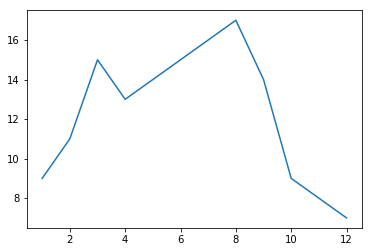

In [36]:
plt.plot(df2.month, df2.rainy_days)
plt.show()

In [23]:
df2.plot()

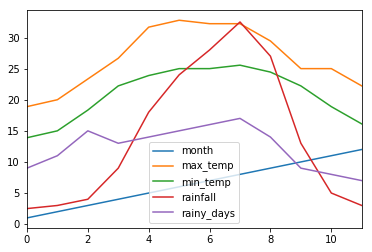

In [24]:
plt.show()

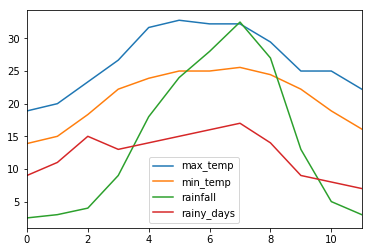

In [34]:
df2.drop('month', axis=1).plot()
plt.show()

Pandas tutorial: http://pandas.pydata.org/pandas-docs/stable/10min.html 
